In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, roc_curve, auc, ndcg_score
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.utils import resample

In [4]:
# Load your dataset
df = pd.read_csv('fake_job_postings.csv')

In [7]:
# Data Cleaning and Handling Missing Values
df.dropna(subset=['description', 'fraudulent'], inplace=True)

In [8]:
# Assuming you have a 'description' column for job text and a 'fraudulent' column for labels
X = df['description'].astype(str)  # Convert to string to handle potential NaN values
y = df['fraudulent']


In [9]:
# Step 1: Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [10]:
# Print the shape of the training, validation, and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (12515,) (12515,)
Validation set shape: (2682,) (2682,)
Testing set shape: (2682,) (2682,)


In [11]:
# Create a DataFrame for the dataset splits
split_data = {
    'Dataset': ['Training', 'Validation', 'Testing'],
    'Samples': [len(X_train), len(X_val), len(X_test)]
}
split_df = pd.DataFrame(split_data)


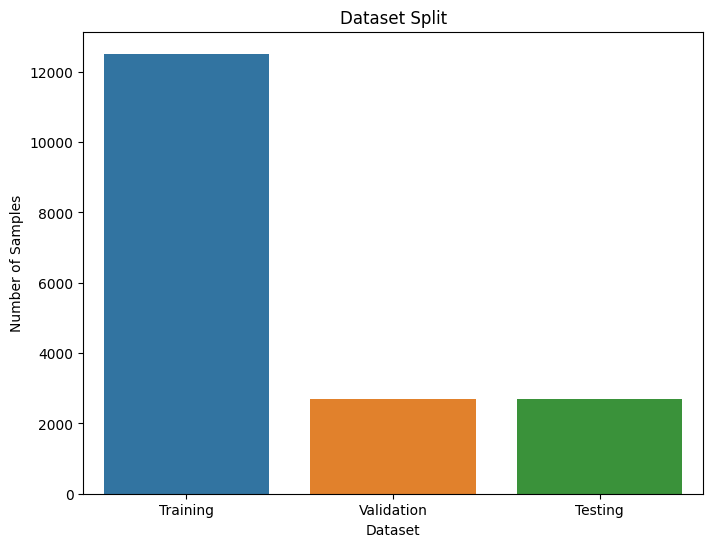

In [9]:
# Plot the dataset split using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Dataset', y='Samples', data=split_df)
plt.title('Dataset Split')
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.show()


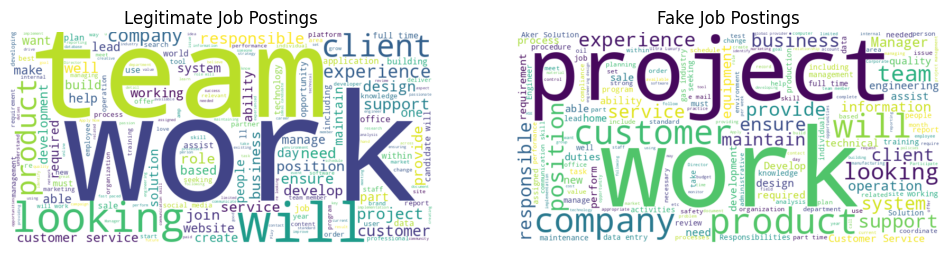

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'description' and 'fraudulent' columns
legit_jobs = df[df['fraudulent'] == 0]['description'].values
fake_jobs = df[df['fraudulent'] == 1]['description'].values

# Generate Word Cloud for Legitimate Jobs
legit_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(legit_jobs))

# Generate Word Cloud for Fake Jobs
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(fake_jobs))

# Plot Word Clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(legit_wordcloud, interpolation='bilinear')
plt.title('Legitimate Job Postings')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake Job Postings')
plt.axis('off')

plt.show()


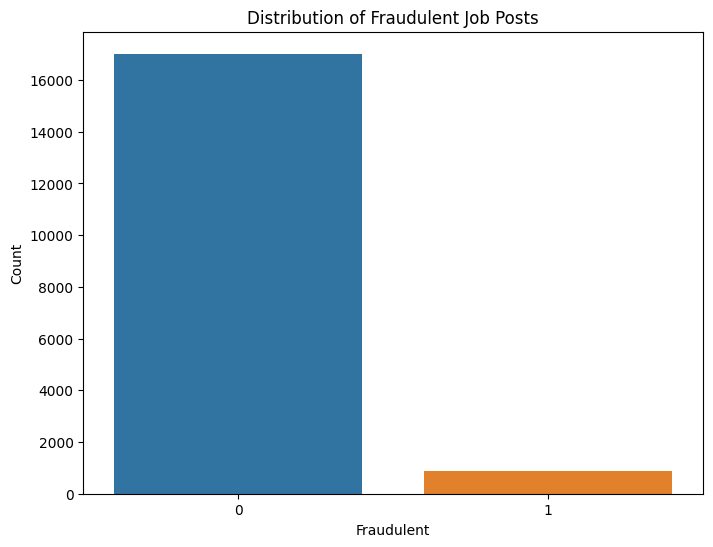

In [13]:
# Exploratory Data Analysis (EDA)
# Your EDA code here (visualizations, summary statistics, etc.)

# Visualize the distribution of the target variable 'fraudulent'
plt.figure(figsize=(8, 6))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Fraudulent Job Posts')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

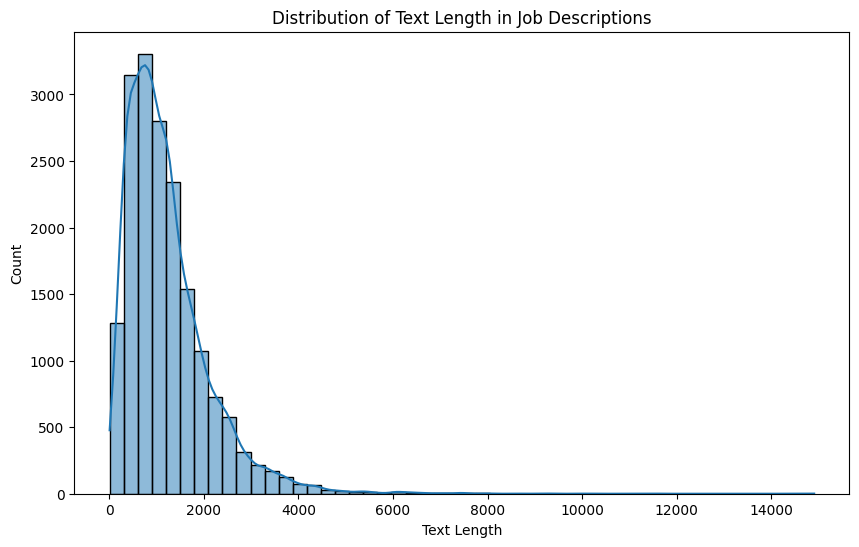

In [14]:
# Visualize the distribution of text lengths in job descriptions
df['text_length'] = df['description'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length in Job Descriptions')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [15]:
# Feature Engineering
# Your feature engineering code here

# Example: Creating a feature for the number of words in the job description
df['num_words'] = df['description'].apply(lambda x: len(str(x).split()))

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Step 2: Instantiate the CountVectorizer or TfidfVectorizer for text features
vectorizer = TfidfVectorizer()  # Consider using TfidfVectorizer for better representation of text features


In [19]:
# Step 3: Convert text data to lowercase, tokenize, and vectorize
X_train_lower = [doc.lower() if isinstance(doc, str) else str(doc).lower() for doc in X_train]
X_train_lower = np.array(X_train_lower)

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train_lower)

# Transform the validation and testing data using the fitted vectorizer
X_val_lower = [doc.lower() if isinstance(doc, str) else str(doc).lower() for doc in X_val]
X_test_lower = [doc.lower() if isinstance(doc, str) else str(doc).lower() for doc in X_test]
X_val_vectorized = vectorizer.transform(X_val_lower)
X_test_vectorized = vectorizer.transform(X_test_lower)

In [21]:
# Step 6: Model Training
# Instantiate the classification models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC(probability=True)  # Set probability=True for later ROC curve
logistic_regression = LogisticRegression()


In [22]:
# Train the models using the vectorized training data
decision_tree.fit(X_train_vectorized, y_train)
random_forest.fit(X_train_vectorized, y_train)
svm.fit(X_train_vectorized, y_train)
logistic_regression.fit(X_train_vectorized, y_train)

LogisticRegression()

In [23]:
# Step 7: Model Evaluation (on Validation Set)
models = [decision_tree, random_forest, svm, logistic_regression]

for model in models:
    y_pred_val = model.predict(X_val_vectorized)
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    recall = recall_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val)
    confusion_mat = confusion_matrix(y_val, y_pred_val)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_mat)
    print()

Model: DecisionTreeClassifier
Accuracy: 0.9713, Precision: 0.6930, Recall: 0.6529, F1 Score: 0.6723
Confusion Matrix:
[[2526   35]
 [  42   79]]

Model: RandomForestClassifier
Accuracy: 0.9806, Precision: 1.0000, Recall: 0.5702, F1 Score: 0.7263
Confusion Matrix:
[[2561    0]
 [  52   69]]

Model: SVC
Accuracy: 0.9795, Precision: 1.0000, Recall: 0.5455, F1 Score: 0.7059
Confusion Matrix:
[[2561    0]
 [  55   66]]

Model: LogisticRegression
Accuracy: 0.9676, Precision: 1.0000, Recall: 0.2810, F1 Score: 0.4387
Confusion Matrix:
[[2561    0]
 [  87   34]]



Model: DecisionTreeClassifier
Accuracy: 0.9713, Precision: 0.6930, Recall: 0.6529
Confusion Matrix:
[[2526   35]
 [  42   79]]


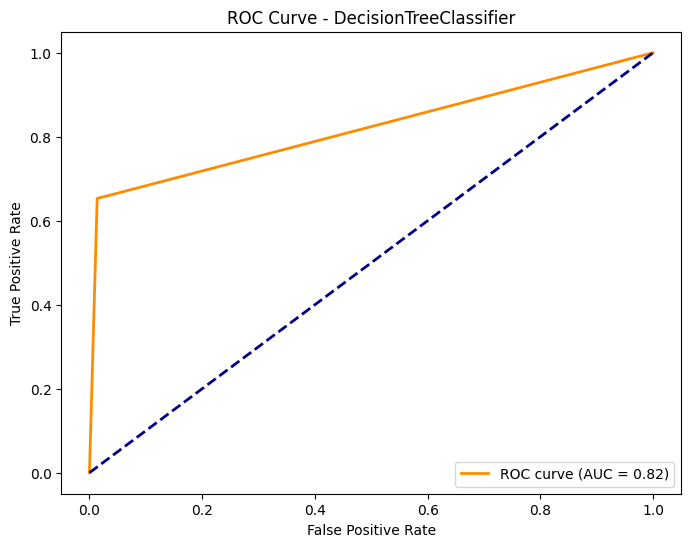


Model: RandomForestClassifier
Accuracy: 0.9806, Precision: 1.0000, Recall: 0.5702
Confusion Matrix:
[[2561    0]
 [  52   69]]


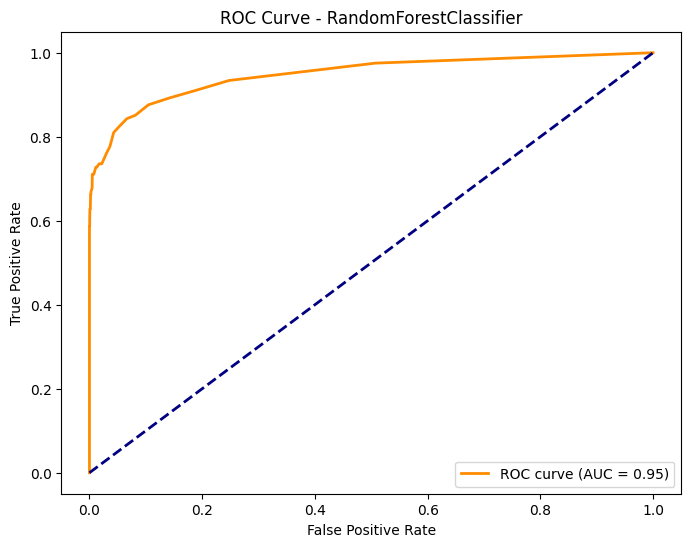


Model: SVC
Accuracy: 0.9795, Precision: 1.0000, Recall: 0.5455
Confusion Matrix:
[[2561    0]
 [  55   66]]


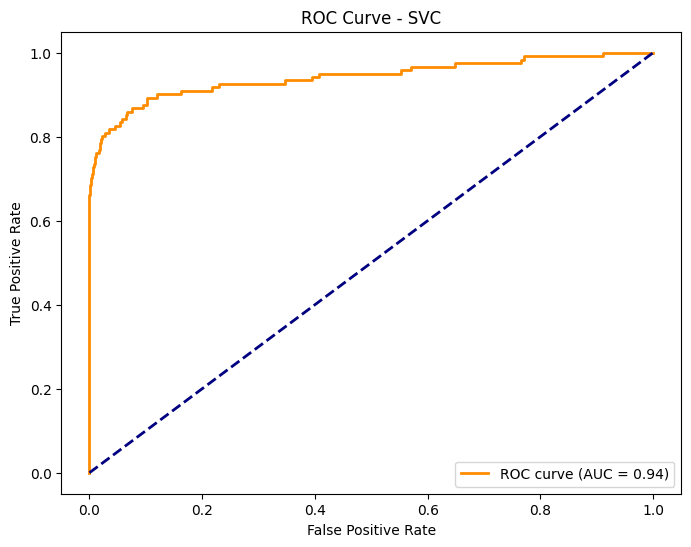


Model: LogisticRegression
Accuracy: 0.9676, Precision: 1.0000, Recall: 0.2810
Confusion Matrix:
[[2561    0]
 [  87   34]]


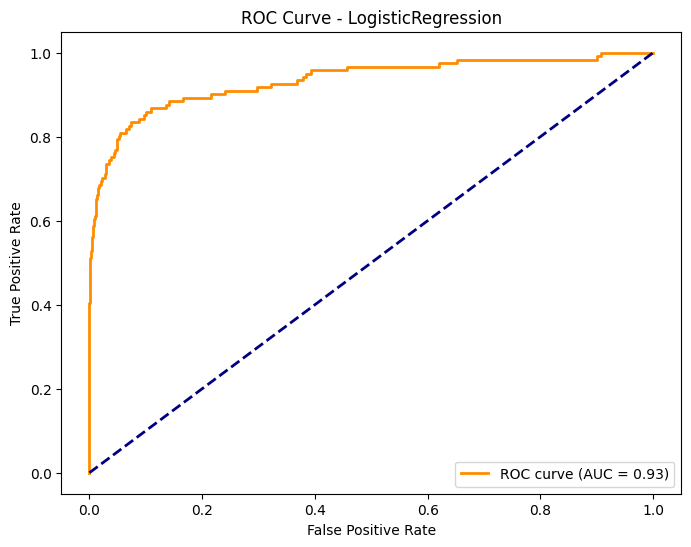

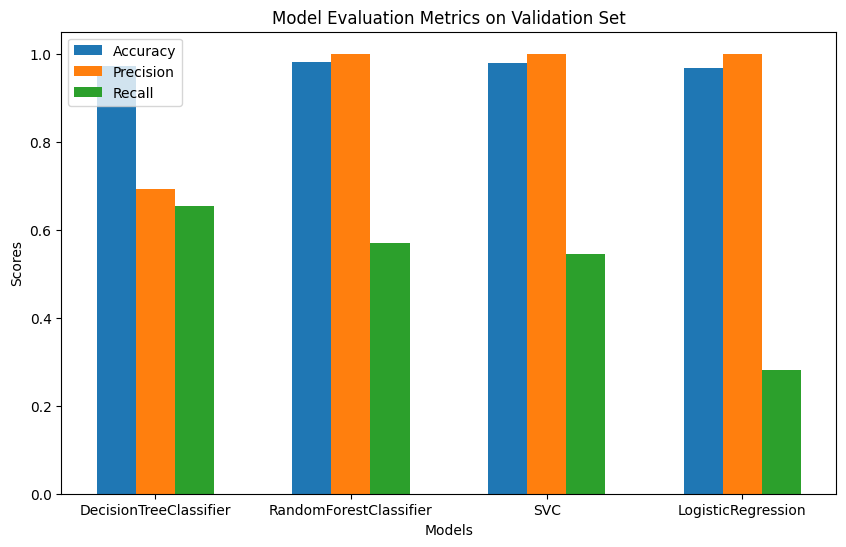

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Step 7: Model Evaluation (on Validation Set)
models = [decision_tree, random_forest, svm, logistic_regression]

accuracy_scores = []
precision_scores = []
recall_scores = []

for model in models:
    y_pred_val = model.predict(X_val_vectorized)
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    recall = recall_score(y_val, y_pred_val)
    confusion_mat = confusion_matrix(y_val, y_pred_val)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(confusion_mat)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val_vectorized)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model.__class__.__name__}')
    plt.legend(loc='lower right')
    plt.show()

    print()

# Plot Bar Graph
labels = [model.__class__.__name__ for model in models]
x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracy_scores, width, label='Accuracy')
plt.bar(x, precision_scores, width, label='Precision')
plt.bar(x + width, recall_scores, width, label='Recall')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics on Validation Set')
plt.xticks(x, labels)
plt.legend()
plt.show()


Model: DecisionTreeClassifier
Confusion Matrix:
[[2526   35]
 [  42   79]]


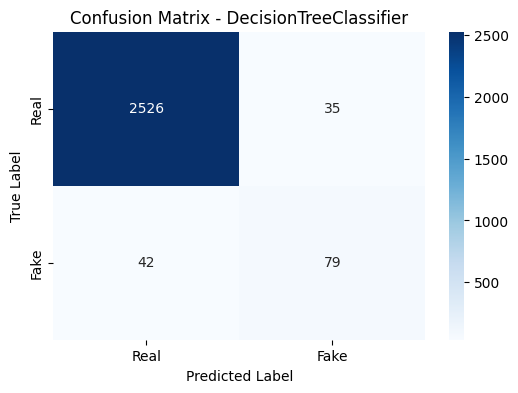


Model: RandomForestClassifier
Confusion Matrix:
[[2561    0]
 [  52   69]]


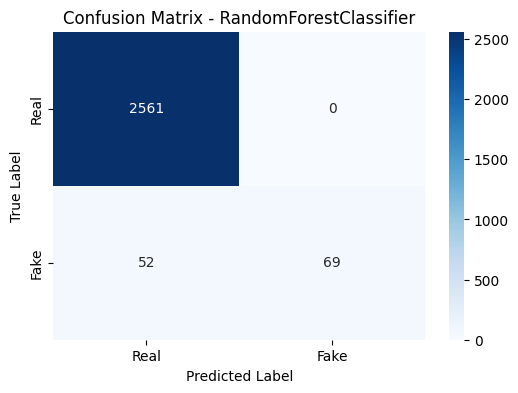


Model: SVC
Confusion Matrix:
[[2561    0]
 [  55   66]]


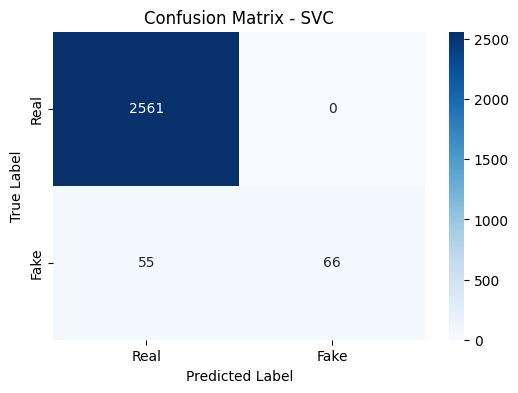


Model: LogisticRegression
Confusion Matrix:
[[2561    0]
 [  87   34]]


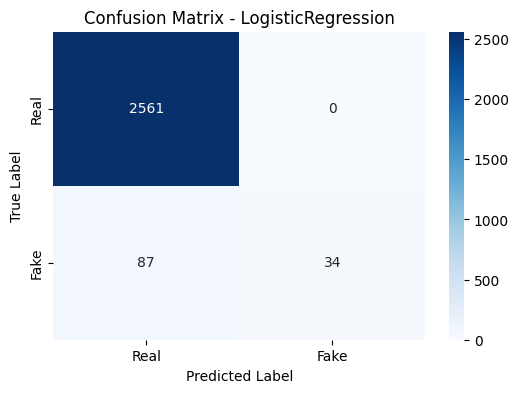

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of real and fake predictions for each model
for model in models:
    y_pred_val = model.predict(X_val_vectorized)
    confusion_mat = confusion_matrix(y_val, y_pred_val)

    print(f"Model: {model.__class__.__name__}")
    print("Confusion Matrix:")
    print(confusion_mat)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print()


In [26]:
# Model Evaluation on the test set
models = [decision_tree, random_forest, svm, logistic_regression]

for model in models:
    y_pred_test = model.predict(X_test_vectorized)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Final Testing Accuracy ({model.__class__.__name__}): {test_accuracy:.4f}")

Final Testing Accuracy (DecisionTreeClassifier): 0.9724
Final Testing Accuracy (RandomForestClassifier): 0.9780
Final Testing Accuracy (SVC): 0.9746
Final Testing Accuracy (LogisticRegression): 0.9638


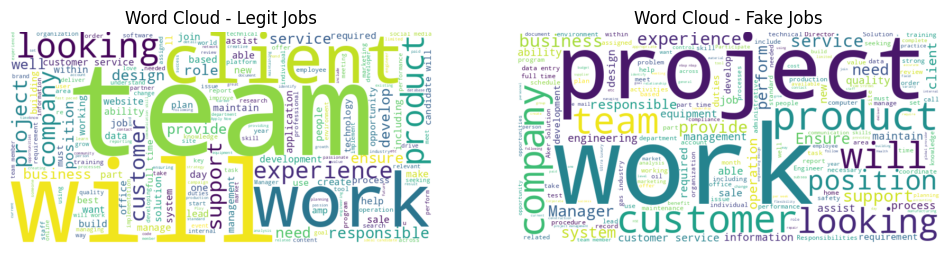

In [27]:
# Step 9: Visualizations
# Visualize Legit and Fake Jobs
legit_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(X_train[y_train == 0]))
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(X_train[y_train == 1]))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(legit_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Legit Jobs')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Fake Jobs')
plt.axis('off')

plt.show()

In [28]:
#DNN
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Load your dataset
df = pd.read_csv('fake_job_postings.csv')

# Assuming you have a 'description' column for job text and a 'fraudulent' column for labels
X = df['description'].astype(str)  # Convert to string to handle potential NaN values
y = df['fraudulent']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train.astype(str))  # Make sure all values are strings
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=200, truncating='post', padding='post')

# Perform the same preprocessing for the test set
X_test_sequences = tokenizer.texts_to_sequences(X_test.astype(str))
X_test_padded = pad_sequences(X_test_sequences, maxlen=200, truncating='post', padding='post')


In [29]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Define the deep learning model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=200))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213301 (833.21 KB)
Trainable params: 213301 (833.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
179/179 [==============================] - 74s 369ms/step - loss: 0.2153 - accuracy: 0.9524 - val_loss: 0.2023 - val_accuracy: 0.9493
Epoch 2/5
179/179 [==============================] - 68s 381ms/step - loss: 0.1905 - accuracy: 0.9528 - val_loss: 0.2005 - val_accu

112/112 [==============================] - 9s 71ms/step
Confusion Matrix:
[[3395    0]
 [ 181    0]]


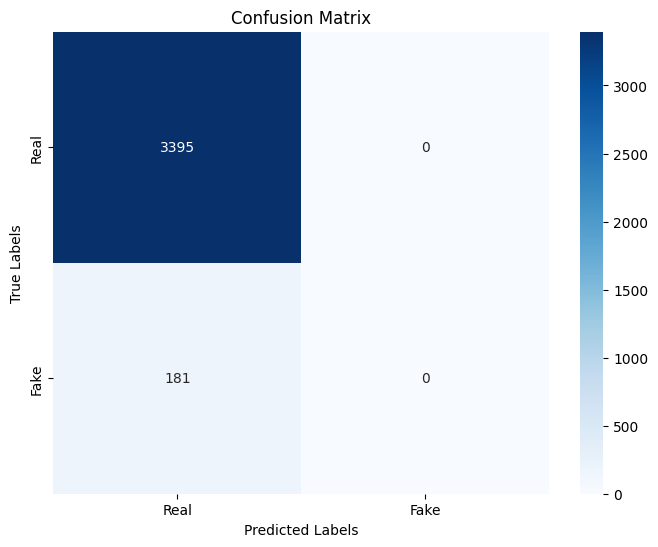

In [33]:
# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_padded)

# Apply a threshold to get binary predictions
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


112/112 [==============================] - 9s 83ms/step


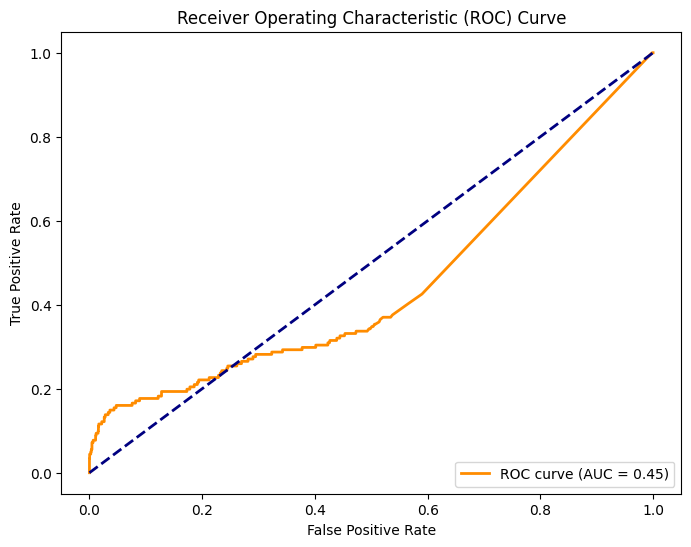

In [37]:
from sklearn.metrics import roc_curve, auc

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_padded)

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


